# Budget Analysis

---

## Environment Setup

In [1]:
# Initial Imports
import os
import plaid
import requests
import datetime
import json
import pandas as pd
from dotenv import load_dotenv

%matplotlib inline

In [2]:
# Helper functions

def pretty_print_response(response):
    
   #  This function formats a JSON file to pretty printing it in the screen.
    
    print(json.dumps(response, indent=4, sort_keys=True))

In [3]:
# Set environment variables from the .env file
load_dotenv()

True

In [4]:
# Extract API keys from environment variables
PLAID_CLIENT_ID = "5f13152952cdf50011c63e83"
PLAID_SECRET = "34f0a204227babdcdf1f0513e9ffce"
PLAID_PUBLIC_KEY = "30912c52875e1964fca37475d687c7"

---

## Plaid Access Token

In this section, you will use the `plaid-python` API to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:

1. Create a client to connect to plaid

2. Use the client to generate a public token and request the following items: ['transactions', 'income', 'assets']

3. Exchange the public token for an access token

4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [5]:
# Create the client object

client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SECRET, public_key=PLAID_PUBLIC_KEY, environment='sandbox')

# Get institutions
client.Institutions.get(2)

# from 14 refresher, above "create public token" and below "create client object and fetch financial"

{'institutions': [{'country_codes': ['US'],
   'credentials': [{'label': 'Username', 'name': 'username', 'type': 'text'},
    {'label': 'Password', 'name': 'password', 'type': 'password'}],
   'has_mfa': True,
   'input_spec': 'fixed',
   'institution_id': 'ins_112060',
   'mfa': ['code', 'list', 'questions', 'selections'],
   'mfa_code_type': 'numeric',
   'name': '1st Bank (Broadus, MT) - Personal',
   'oauth': False,
   'products': ['assets',
    'auth',
    'balance',
    'transactions',
    'income',
    'identity'],
   'routing_numbers': []},
  {'country_codes': ['US'],
   'credentials': [{'label': 'Username', 'name': 'username', 'type': 'text'},
    {'label': 'Password', 'name': 'password', 'type': 'password'}],
   'has_mfa': True,
   'input_spec': 'fixed',
   'institution_id': 'ins_112062',
   'mfa': ['code', 'list', 'questions', 'selections'],
   'mfa_code_type': 'numeric',
   'name': '1st Constitution Bank - Personal',
   'oauth': False,
   'products': ['assets',
    'auth',


In [6]:
# Set the institution id
INSITUTION_ID = "ins_109508"

### 2. Generate a public token

In [7]:
# Create the public token

# Print the public token
# 14 Refresher under create public token and exchange and above get list of accounts

# Select an institution for processing
INSTITUTION_ID = "ins_109512"

# Create public token to be exchanged for institution access token
create_tkn_response = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions','income','assets'])

# Exchange public token for access token
exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])

# Store access token as variable
access_token = exchange_response['access_token']


### 3. Exchange the public token for an access token

In [8]:
# Retrieve the access token

# Print the access toke

# Exchange public token for access token
exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])

# Store access token as variable
access_token = exchange_response['access_token']


In [9]:
# Store the access token in a Python variable


### 4. Fetch Accounts

In [10]:
# Retrieve accounts same as fetch and get?

# Print accounts


# Get accounts associated with institution
client.Accounts.get(access_token)

{'accounts': [{'account_id': 'P4pJD3lpdnIQK8xWvJo8UzrJGbJJJMf7ZyPNr',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': 'jdVvnyWVKQsoaJzwB5GJHd8XqnXXX1u1qRVGq',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': '7jAoDZKAWzUyLWMDmZlWIVkN5zNNNEfgLBo1n',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days

2. Print the categories for each transaction type

3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)

4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [12]:
# Set the start and end date 90 days from today

# Retrieve the transactions for the last 90 days

# Print the transactions


# Get transactions for institution for specific date range
#start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-30))
# end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())

start_date = '{:2020-04-24}'.format(datetime.datetime.now() + datetime.timedelta(-30))
end_date = '{:2020-07-24}'.format(datetime.datetime.now())


# Get transactions for date range
transaction_response = client.Transactions.get(access_token,start_date,end_date)

# Print JSON output
print(json.dumps(transaction_response['transactions'][:2],indent=4, sort_keys=True))
# income...

[
    {
        "account_id": "erVLWApV8NUpRK8ZkyrKcQ6ANvAAAeiL134Vk",
        "account_owner": null,
        "amount": 500,
        "authorized_date": null,
        "category": [
            "Food and Drink",
            "Restaurants"
        ],
        "category_id": "13005000",
        "date": "2020-07-24",
        "iso_currency_code": "USD",
        "location": {
            "address": null,
            "city": null,
            "country": null,
            "lat": null,
            "lon": null,
            "postal_code": null,
            "region": null,
            "store_number": null
        },
        "merchant_name": "Tectra Inc",
        "name": "Tectra Inc",
        "payment_channel": "in store",
        "payment_meta": {
            "by_order_of": null,
            "payee": null,
            "payer": null,
            "payment_method": null,
            "payment_processor": null,
            "ppd_id": null,
            "reason": null,
            "reference_number": null
  

### 2. Print the categories for each transaction

In [15]:
# Create a for-loop to print the categories for each transaction
# need to make or loop... but also print to where?

#for item in transaction_response['transactions']:
  #  print(item["category"])
    
    
# alt below
for transactions in transaction_response['transactions']:
    if transactions['category']:
        print(json.dumps(transactions['category'], indent=4, sort_keys=True))
    # 
        # 

[
    "Food and Drink",
    "Restaurants"
]
[
    "Payment"
]
[
    "Food and Drink",
    "Restaurants",
    "Fast Food"
]
[
    "Shops",
    "Sporting Goods"
]
[
    "Payment",
    "Credit Card"
]
[
    "Travel",
    "Taxi"
]
[
    "Transfer",
    "Debit"
]
[
    "Transfer",
    "Deposit"
]
[
    "Recreation",
    "Gyms and Fitness Centers"
]
[
    "Travel",
    "Airlines and Aviation Services"
]
[
    "Food and Drink",
    "Restaurants",
    "Fast Food"
]
[
    "Food and Drink",
    "Restaurants",
    "Coffee Shop"
]
[
    "Food and Drink",
    "Restaurants"
]
[
    "Transfer",
    "Credit"
]
[
    "Travel",
    "Airlines and Aviation Services"
]
[
    "Travel",
    "Taxi"
]
[
    "Food and Drink",
    "Restaurants"
]
[
    "Payment"
]
[
    "Food and Drink",
    "Restaurants",
    "Fast Food"
]
[
    "Shops",
    "Sporting Goods"
]
[
    "Payment",
    "Credit Card"
]
[
    "Travel",
    "Taxi"
]
[
    "Transfer",
    "Debit"
]
[
    "Transfer",
    "Deposit"
]
[
    "Recreation",
 

### 3. Create a new DataFrame using the following fields from the JSON transaction data: `date`, `name`, `amount`, `category`. 

(For categories with more than one label, just use the first category label in the list)

In [16]:
# Define an empty DataFrame and set the columns as date, name, amount, and category
analysis_fiduciary_df = pd.DataFrame()
# Retrieve all the transactions
date=[]
name=[]
amount=[]
category=[]
# Populate the transactions DataFrame with the transactions data
for transactions in transaction_response['transactions']:
    date.append(transactions["date"])
    name.append(transactions["name"])
# 
    amount.append(transactions["amount"])
    category.append(transactions["category"])

analysis_fiduciary_df["date"]=date
analysis_fiduciary_df["name"]=name
analysis_fiduciary_df["amount"] = amount
analysis_fiduciary_df["category"] = category



# Display sample data from the DataFrame     
analysis_fiduciary_df.head()
# https://datatofish.com/load-json-pandas-dataframe/
# https://www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/#:~:text=%23%20print%20dataframe.&text=To%20create%20DataFrame%20from%20dict,n%20is%20the%20array%20length.

,date,name,amount,category
0,2020-07-24,Tectra Inc,500.0,"[Food and Drink, Restaurants]"
1,2020-07-23,AUTOMATIC PAYMENT - THANK,2078.5,[Payment]
2,2020-07-23,KFC,500.0,"[Food and Drink, Restaurants, Fast Food]"
3,2020-07-23,Madison Bicycle Shop,500.0,"[Shops, Sporting Goods]"
4,2020-07-14,CREDIT CARD 3333 PAYMENT *//,25.0,"[Payment, Credit Card]"


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [17]:
# Display data types
analysis_fiduciary_df.dtypes

date         object
name         object
amount      float64
category     object
dtype: object

In [18]:
# Make any required data type transformation
analysis_fiduciary_df = analysis_fiduciary_df.set_index(pd.to_datetime(analysis_fiduciary_df["date"], infer_datetime_format=True)).copy()
analysis_fiduciary_df

,date,name,amount,category
date,,,,
2020-07-24,2020-07-24,Tectra Inc,500.00,"[Food and Drink, Restaurants]"
2020-07-23,2020-07-23,AUTOMATIC PAYMENT - THANK,2078.50,[Payment]
2020-07-23,2020-07-23,KFC,500.00,"[Food and Drink, Restaurants, Fast Food]"
2020-07-23,2020-07-23,Madison Bicycle Shop,500.00,"[Shops, Sporting Goods]"
2020-07-14,2020-07-14,CREDIT CARD 3333 PAYMENT *//,25.00,"[Payment, Credit Card]"
2020-07-14,2020-07-14,Uber 063015 SF**POOL**,5.40,"[Travel, Taxi]"
2020-07-13,2020-07-13,ACH Electronic CreditGUSTO PAY 123456,5850.00,"[Transfer, Debit]"
2020-07-13,2020-07-13,CD DEPOSIT .INITIAL.,1000.00,"[Transfer, Deposit]"
2020-07-12,2020-07-12,Touchstone Climbing,78.50,"[Recreation, Gyms and Fitness Centers]"


In [19]:
analysis_fiduciary_df = analysis_fiduciary_df.drop(columns=["date"])
analysis_fiduciary_df

,name,amount,category
date,,,
2020-07-24,Tectra Inc,500.00,"[Food and Drink, Restaurants]"
2020-07-23,AUTOMATIC PAYMENT - THANK,2078.50,[Payment]
2020-07-23,KFC,500.00,"[Food and Drink, Restaurants, Fast Food]"
2020-07-23,Madison Bicycle Shop,500.00,"[Shops, Sporting Goods]"
2020-07-14,CREDIT CARD 3333 PAYMENT *//,25.00,"[Payment, Credit Card]"
2020-07-14,Uber 063015 SF**POOL**,5.40,"[Travel, Taxi]"
2020-07-13,ACH Electronic CreditGUSTO PAY 123456,5850.00,"[Transfer, Debit]"
2020-07-13,CD DEPOSIT .INITIAL.,1000.00,"[Transfer, Deposit]"
2020-07-12,Touchstone Climbing,78.50,"[Recreation, Gyms and Fitness Centers]"


In [20]:
analysis_fiduciary_df = analysis_fiduciary_df.sort_index()
analysis_fiduciary_df

,name,amount,category
date,,,
2020-04-24,Madison Bicycle Shop,500.00,"[Shops, Sporting Goods]"
2020-04-24,KFC,500.00,"[Food and Drink, Restaurants, Fast Food]"
2020-04-24,AUTOMATIC PAYMENT - THANK,2078.50,[Payment]
2020-04-25,Tectra Inc,500.00,"[Food and Drink, Restaurants]"
2020-04-28,Uber 072515 SF**POOL**,6.33,"[Travel, Taxi]"
2020-04-30,United Airlines,500.00,"[Travel, Airlines and Aviation Services]"
2020-05-10,INTRST PYMNT,-4.22,"[Transfer, Credit]"
2020-05-11,SparkFun,89.40,"[Food and Drink, Restaurants]"
2020-05-12,Starbucks,4.33,"[Food and Drink, Restaurants, Coffee Shop]"


In [21]:
# Set the date column as index may be from whale analysis
# Display sample data


---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:

1. Determine the previous year's gross income and print the results

2. Determine the current monthly income and print the results

3. Determine the projected yearly income and print the results

In [22]:
# Fetch de income data
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-365))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())


# Print the income data
income_data = client.Income.get(access_token)
income_response = client.Income.get(access_token)
pretty_print_response(income_response)

{
    "income": {
        "income_streams": [
            {
                "confidence": 0.99,
                "days": 690,
                "monthly_income": 500,
                "name": "UNITED AIRLINES"
            }
        ],
        "last_year_income": 6000,
        "last_year_income_before_tax": 7285,
        "max_number_of_overlapping_income_streams": 1,
        "number_of_income_streams": 1,
        "projected_yearly_income": 6085,
        "projected_yearly_income_before_tax": 7389
    },
    "request_id": "g7Q0xZjBxtpbWfo"
}


In [26]:
# Determine the previous year's gross income and print the results
income_data["income"]['last_year_income_before_tax'] 
# supposed to be 7285

7285

In [28]:
# Determine the current monthly income and print the results
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-30))
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())
income_data['income']['income_streams'][0]['monthly_income'] #supposed to be 500

500

In [30]:
# Determine the projected yearly income and print the results
income_data["income"]['projected_yearly_income'] 
#answer supposed to be 6085
analysis_fiduciary_df

,name,amount,category
date,,,
2020-04-24,Madison Bicycle Shop,500.00,"[Shops, Sporting Goods]"
2020-04-24,KFC,500.00,"[Food and Drink, Restaurants, Fast Food]"
2020-04-24,AUTOMATIC PAYMENT - THANK,2078.50,[Payment]
2020-04-25,Tectra Inc,500.00,"[Food and Drink, Restaurants]"
2020-04-28,Uber 072515 SF**POOL**,6.33,"[Travel, Taxi]"
2020-04-30,United Airlines,500.00,"[Travel, Airlines and Aviation Services]"
2020-05-10,INTRST PYMNT,-4.22,"[Transfer, Credit]"
2020-05-11,SparkFun,89.40,"[Food and Drink, Restaurants]"
2020-05-12,Starbucks,4.33,"[Food and Drink, Restaurants, Coffee Shop]"


In [33]:
income_data["income"]['projected_yearly_income'] 


6085

---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)

2. Generate a bar chart with the number of transactions for each category

3. Calulate the expenses per month

4. Plot the total expenses per month

### Calculate the expenses per category

In [34]:
# Compute the total expenses per category
expenses_per_category = analysis_fiduciary_df["category"].value_counts()
# Display the expenses per catefory
expenses_per_category

[Food and Drink, Restaurants, Fast Food]      7
[Food and Drink, Restaurants]                 7
[Travel, Airlines and Aviation Services]      6
[Travel, Taxi]                                6
[Payment]                                     4
[Shops, Sporting Goods]                       4
[Transfer, Debit]                             3
[Payment, Credit Card]                        3
[Transfer, Credit]                            3
[Recreation, Gyms and Fitness Centers]        3
[Transfer, Deposit]                           3
[Food and Drink, Restaurants, Coffee Shop]    3
Name: category, dtype: int64

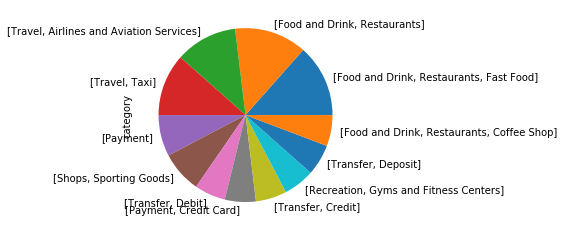

In [36]:
# Create a spending categories pie chart.
expenses_per_category.plot.pie()

### Calculate the expenses per month

In [37]:
# Create a DataFrame with the total expenses
analysis_fiduciary_df.index
# Display sample data
analysis_fiduciary_df.sample()

,name,amount,category
date,,,
2020-07-23,AUTOMATIC PAYMENT - THANK,2078.5,[Payment]


In [41]:
# Create a spending per month bar chart
analysis_fiduciary_df["year"] = analysis_fiduciary_df.index.year
analysis_fiduciary_df["month"] = analysis_fiduciary_df.index.month
analysis_fiduciary_df["date"] = analysis_fiduciary_df.index.date

complete_budget_analysis = analysis_fiduciary_df.groupby(["year", "month"]).sum()
complete_budget_analysis


amount
year month          
2020 4       4084.83
     5      10645.24
     6      10645.24
     7      10138.91

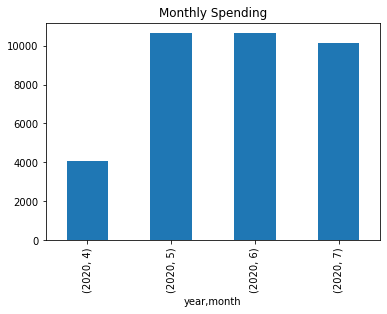

In [42]:
complete_budget_analysis["amount"].plot(kind="bar", title="Monthly Spending")

In [ ]:
# 2354 EDT reviewed on 0805 EDT Sunday